Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.shape

(614, 13)

The dataset Contains 614 rows and 13 columns where 12 are independent variables and 1 is target variable

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

This dataset contains three types of data:float64,object and int64

In [18]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [19]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [20]:
df.drop("Loan_ID", axis=1,inplace=True)

In [21]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see null values present in most columns so filing them by imputation method

In [22]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

From the above cell it is clear that we have successfully filled all the null values lets check with heatmap as well

<Axes: >

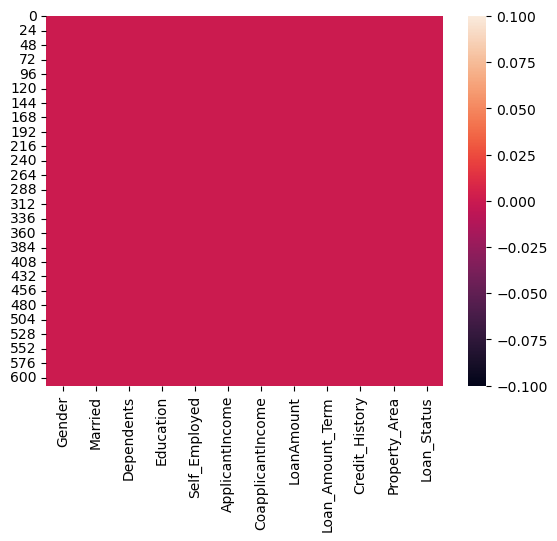

In [24]:
sns.heatmap(df.isnull())

It is clear from the heatmap that we have no missing data present in our dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [26]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


From the above we observe that:
1.The count is same for all the columns which means there are no null values and no missing data present in the dataset.
2.The mean value is greater than the median(50%) in ApplicatIncome, CoapplicantIncome, LoanAmount, which means that data is skewed to right for these columns
3.The median(50%) is greater than the mean in Loan_Amount_Term and Credit_History which means data is skewed to left for these columns
4.There is a huge difference between mean and the standard deviation.

Univarient Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


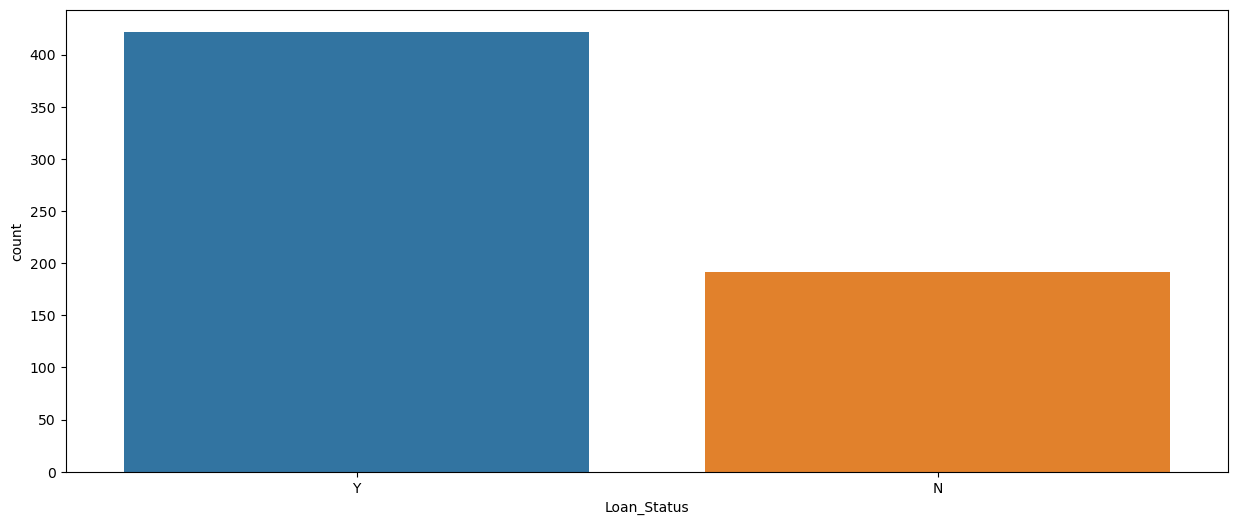

In [28]:
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Loan_Status'])
plt.show()

From the above plot we see that the count of 'Y' is maximum compare to 'N' that means total 422 applicants get their loan approved and only 192 applicants gets denied

Male      502
Female    112
Name: Gender, dtype: int64


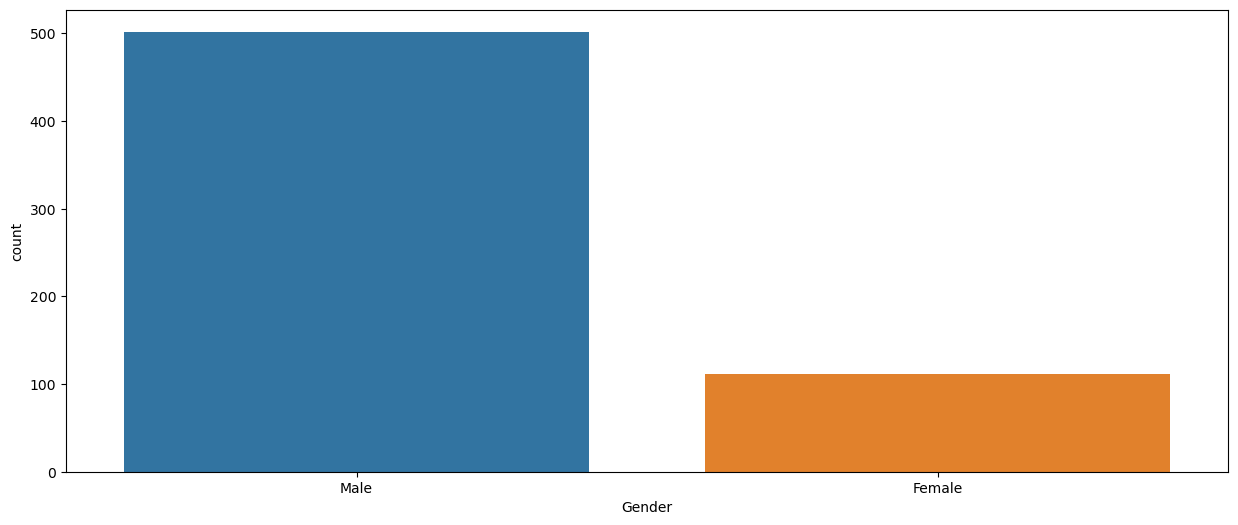

In [29]:
print(df['Gender'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Gender'])
plt.show()

From the above plot we see that there are more number of Male(81%) applying for loan than Female(18%) applicants.

Yes    401
No     213
Name: Married, dtype: int64


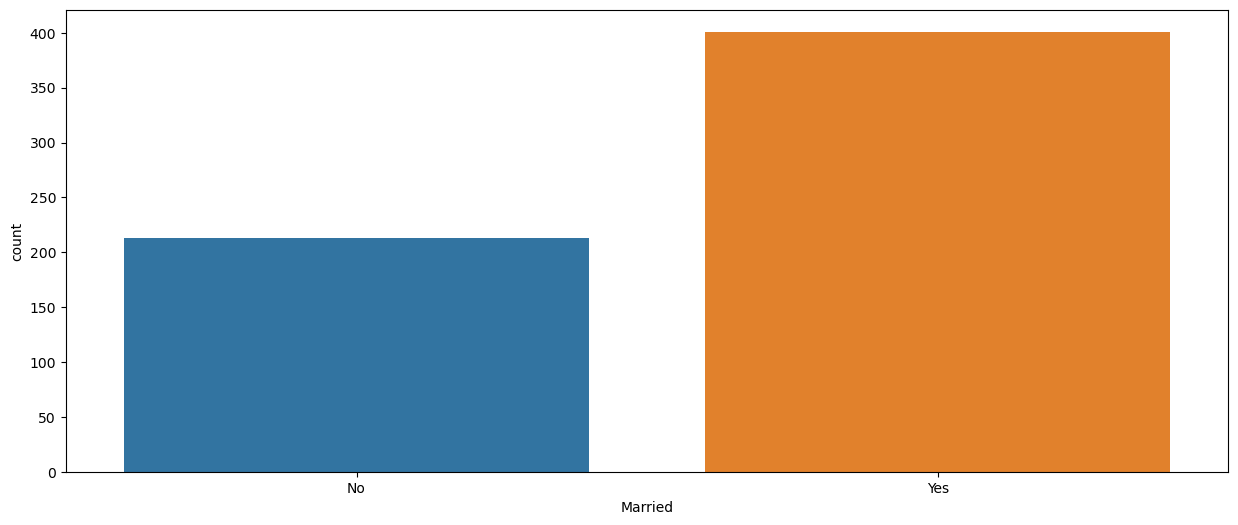

In [30]:
print(df['Married'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Married'])
plt.show()

From the above we can see that the number of Married applicants(65%) who are applying for loan is higher than Unmarried applicants(34%).

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


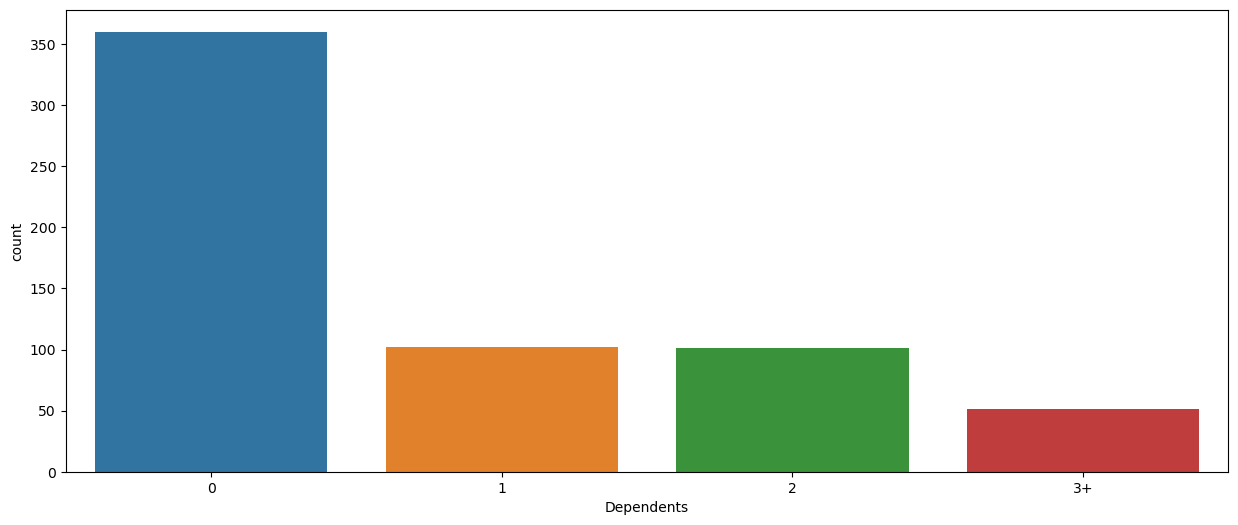

In [32]:
print(df['Dependents'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Dependents'])
plt.show()

From the above plot we observe that he applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


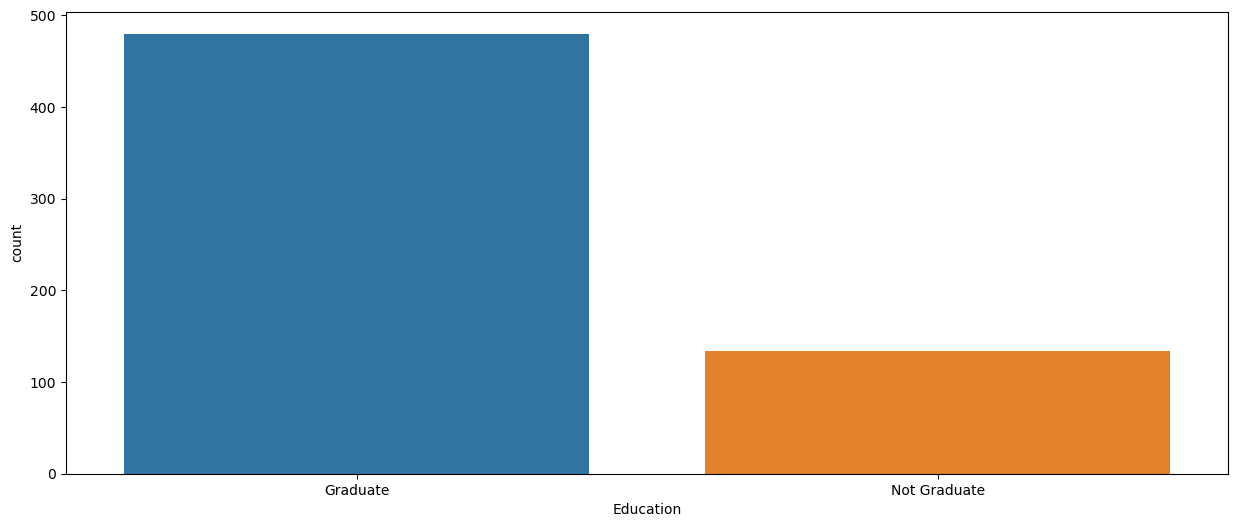

In [33]:
print(df['Education'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Education'])
plt.show()

From the above plot we see that the count of Graduate applicants is high

No     532
Yes     82
Name: Self_Employed, dtype: int64


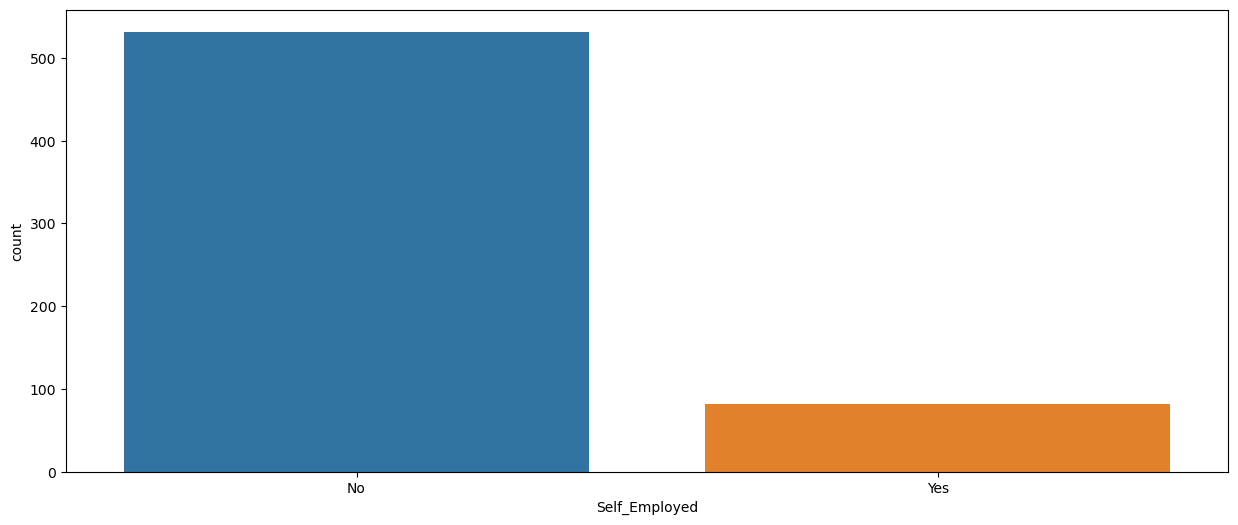

In [34]:
print(df['Self_Employed'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Self_Employed'])
plt.show()

From the above plot we see that most of the applicants or not self employed that means that they might be working in the public sectors and only 82 applicants are self employed or running their own business

1.0    525
0.0     89
Name: Credit_History, dtype: int64


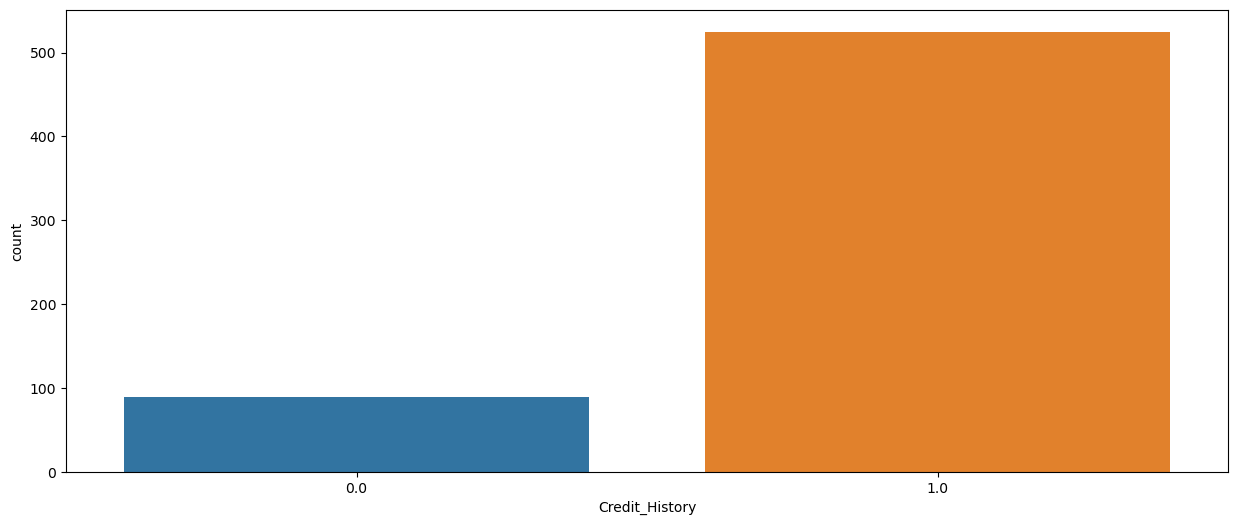

In [35]:
print(df['Credit_History'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(x=df['Credit_History'])
plt.show()

From the above plot it is clear that most of the applicants who have credit history 1 are high in number

Bivarient Analysis

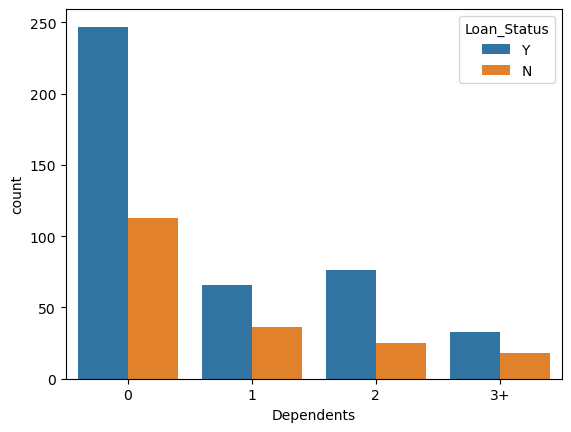

In [37]:
sns.countplot(x=df['Dependents'],hue=df['Loan_Status'])
plt.show()

From the above graph we conclude that the count of 0 dependents is high which means most of the applicants have no dependents, the applicants who have 0 dependents are more likely to get their loan approved

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


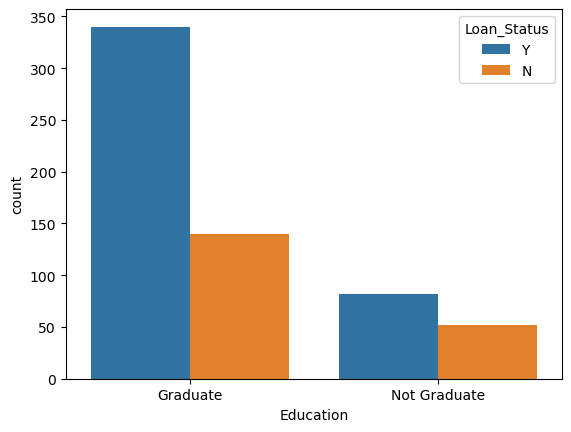

In [39]:
print(df['Education'].value_counts())
sns.countplot(x=df['Education'],hue=df['Loan_Status'])
plt.show()

From the above plot it is clear that most of the applicants who are applying for loan are graduated and only few are not graduated

No     532
Yes     82
Name: Self_Employed, dtype: int64


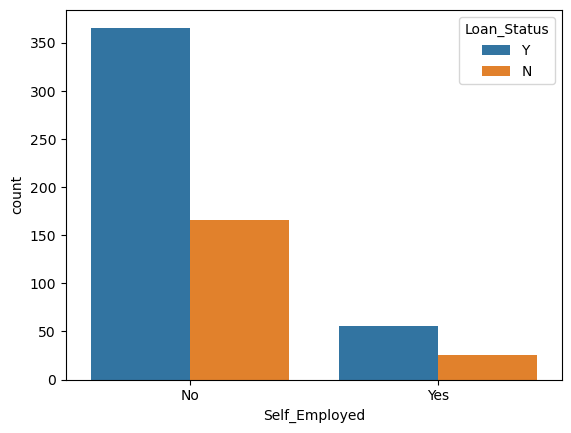

In [40]:
print(df['Self_Employed'].value_counts())
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])
plt.show()

From the above it is clear that most of the applicants are not Self_Employed means they are working in public sectors and only few of the applicants are Self_Employed

1.0    525
0.0     89
Name: Credit_History, dtype: int64


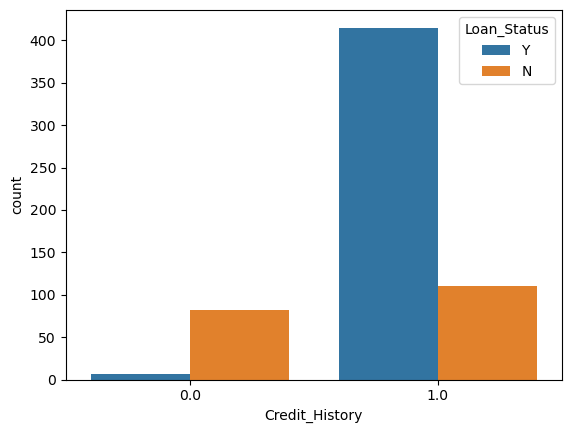

In [41]:
print(df['Credit_History'].value_counts())
sns.countplot(x=df['Credit_History'],hue=df['Loan_Status'])
plt.show()

From the above graph we observe that people who have credit history 1 have high counts which means most of the applicants have cleared their past loan only few of them have to clear the loan

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


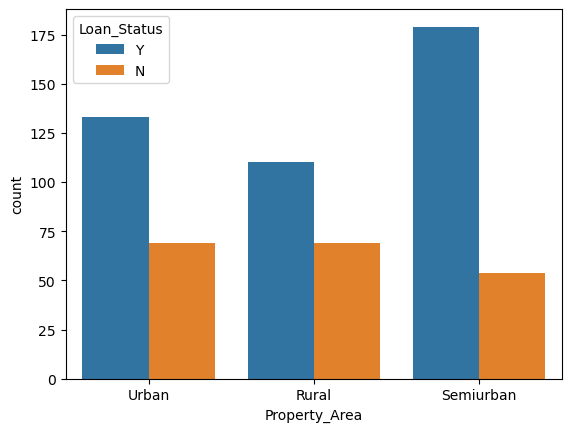

In [42]:
print(df['Property_Area'].value_counts())
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])
plt.show()

From the above plot we see that most of the applicants are Semi-urban who are applying for loan than Urban, also they have more chance of getting their loan approved

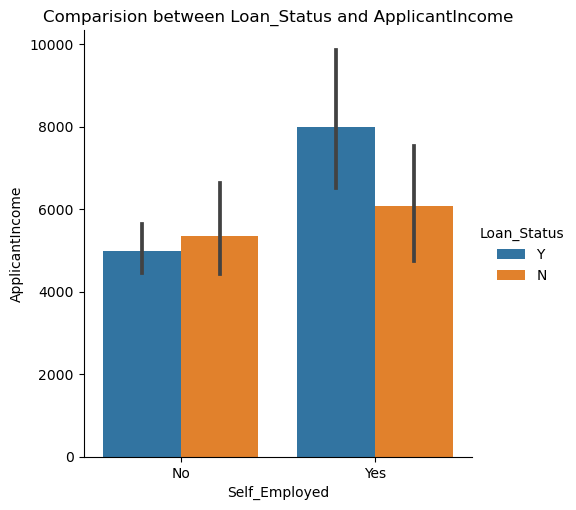

In [43]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicantIncome")
plt.show()


From the above plot it is clear that the applicants whose loan got approved have their own business means they are self employed

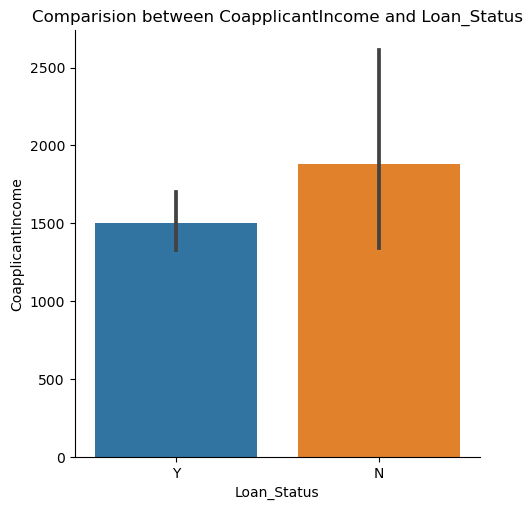

In [44]:
sns.catplot(x='Loan_Status',y="CoapplicantIncome",data=df,kind='bar')
plt.title("Comparision between CoapplicantIncome and Loan_Status")
plt.show()

From the above plot it is clear that the coapplicants who got loan have average income

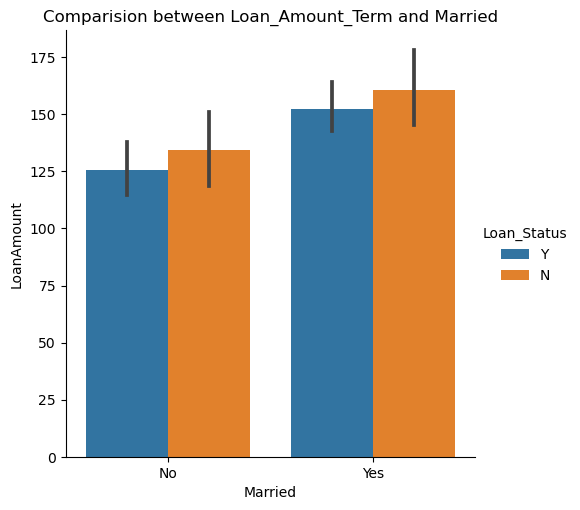

In [45]:
sns.catplot(x='Married',y="LoanAmount",data=df,kind='bar',hue="Loan_Status")
plt.title("Comparision between Loan_Amount_Term and Married")
plt.show()

From the above plot it is clear that the applicant who got married and have average loan amount have more tendency to get a loan

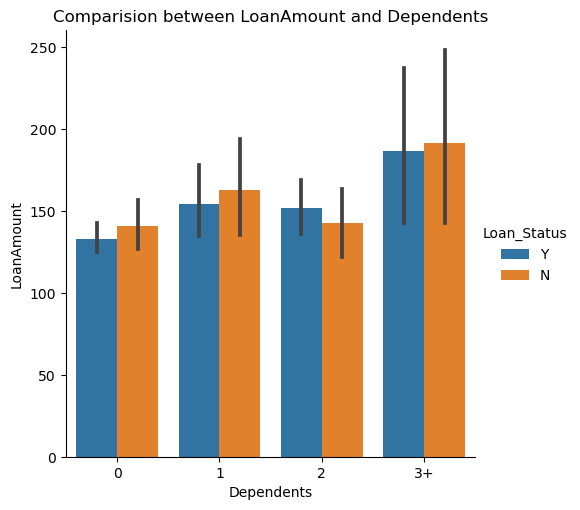

In [46]:
sns.catplot(x='Dependents',y="LoanAmount",data=df,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

From the above plot it is clear that the applicants who have more than 3 dependents with average loan amount have got their loan approved.

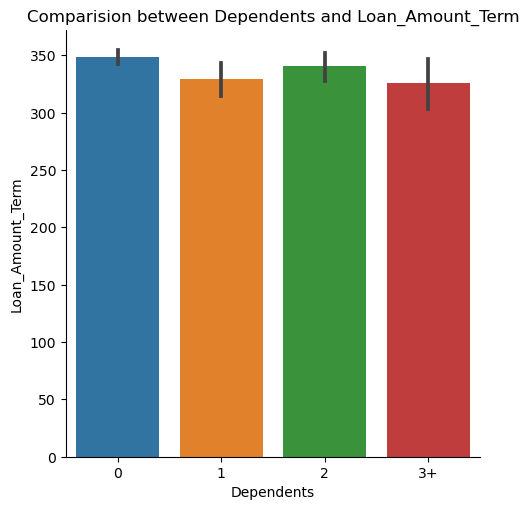

In [47]:
sns.catplot(x='Dependents',y="Loan_Amount_Term",data=df,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

From the above plot it is clear that the applicants having 0 dependents have high Loan amount term followed by the 2 dependents

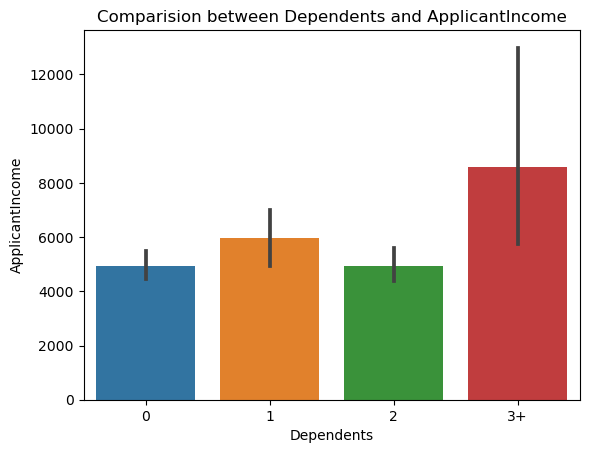

In [48]:
sns.barplot(x='Dependents',y="ApplicantIncome",data=df)
plt.title("Comparision between Dependents and ApplicantIncome")
plt.show()

From the above plot it is clear that the applicants who have more than 3 dependents has high average income and dependents with 2 has less income

MultiVarient Analysis

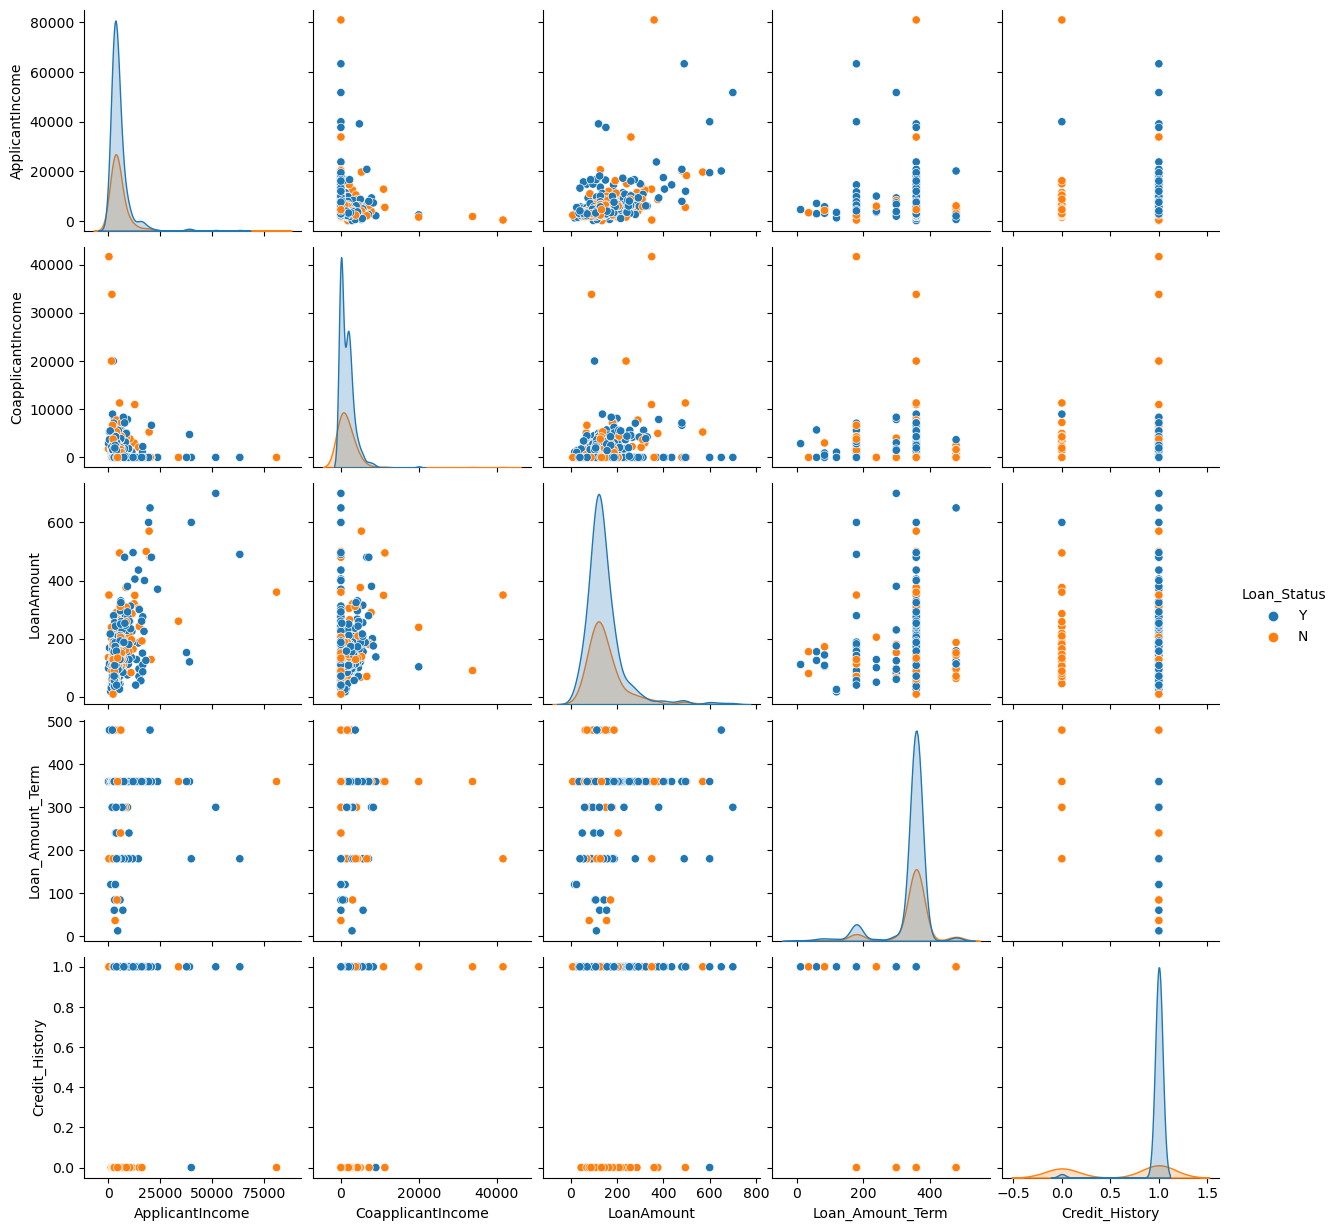

In [50]:
sns.pairplot(df,hue="Loan_Status")

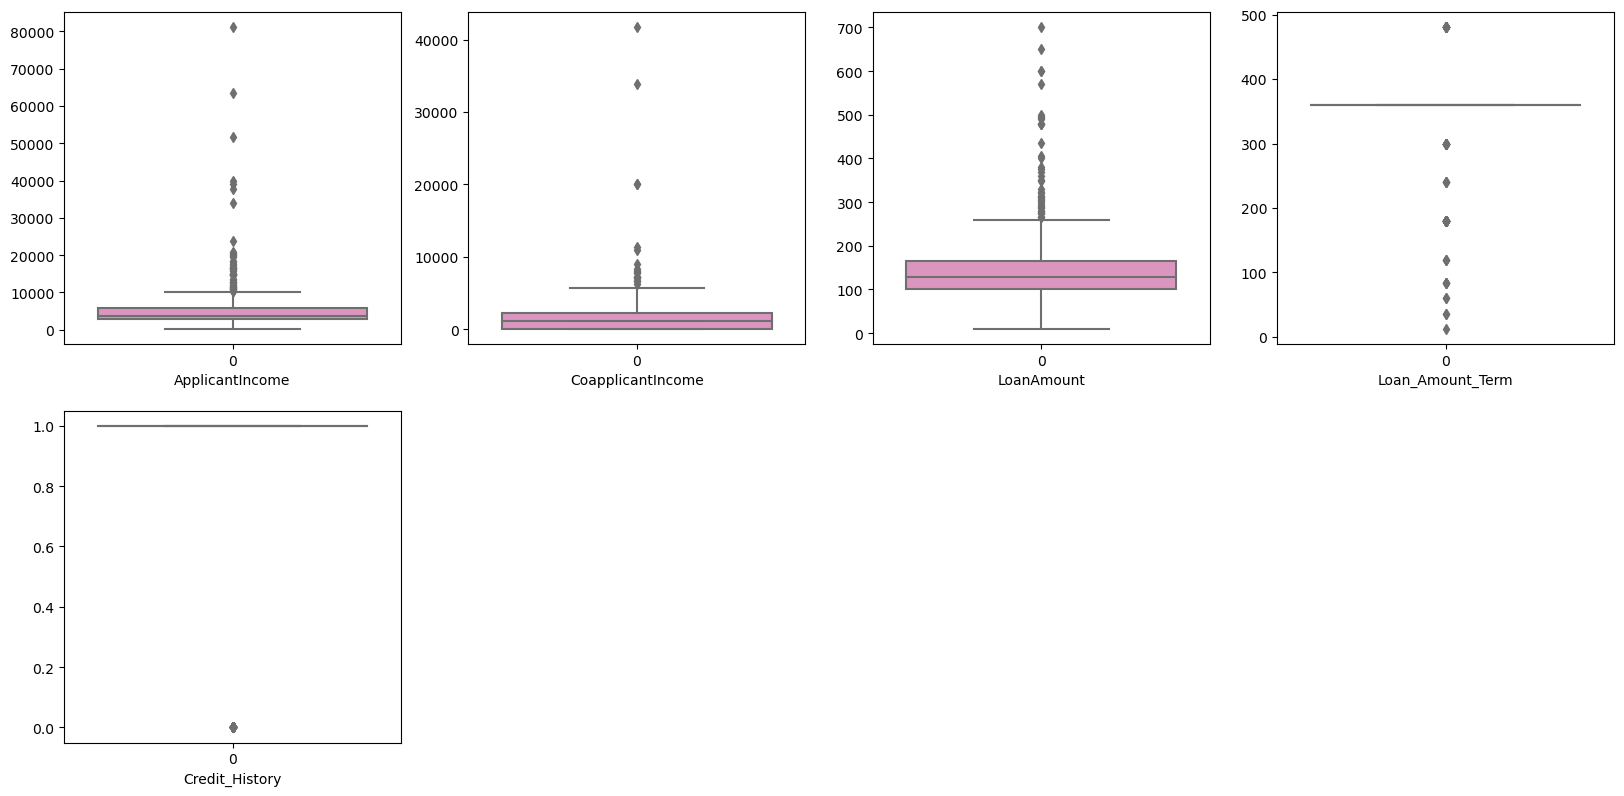

In [52]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [53]:
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
from scipy.stats import zscore
z=np.abs(zscore(features))
z
df = df[(z<3).all(axis=1)]
df.shape

(577, 12)

In [54]:
data_loss = (614-577)/614*100
data_loss

6.026058631921824

In [55]:
df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

we have skewness present in all the columns here the columns Credit_History and Loan_Amount_Term have categorical data and integer type of data so no need to remove skewness in these columns

In [56]:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[features] = scaler.fit_transform(df[features].values)

In [57]:
df.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

From the above we can see that the skewness has been removed in all the numerical integer type columns

In [59]:
categorical_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [61]:
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


<Axes: >

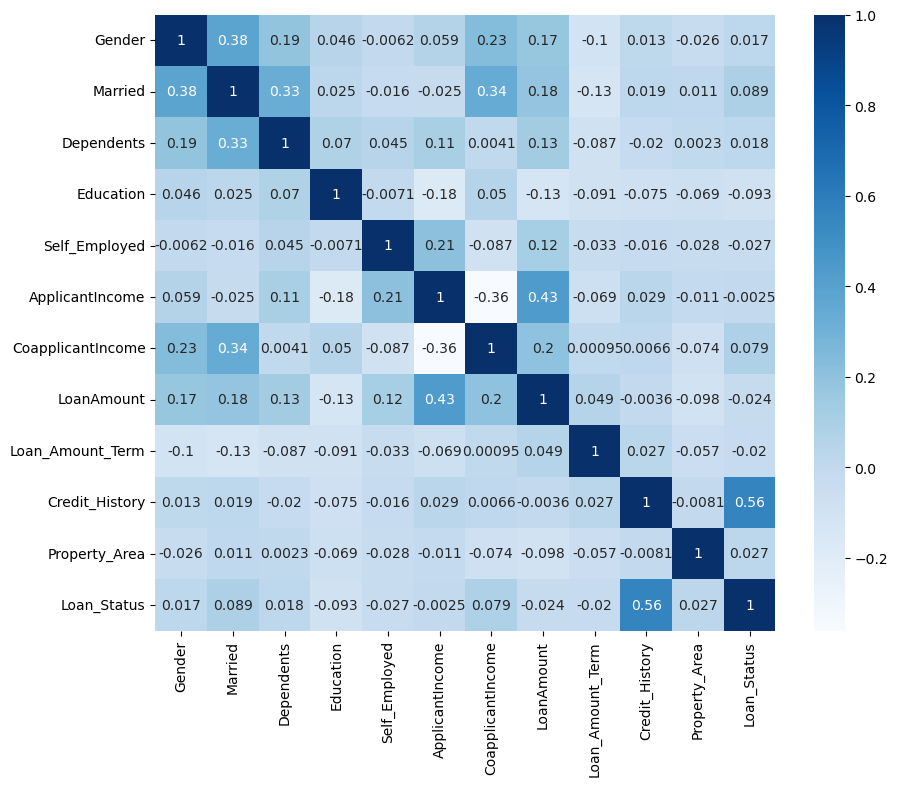

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot = True,cmap="Blues")

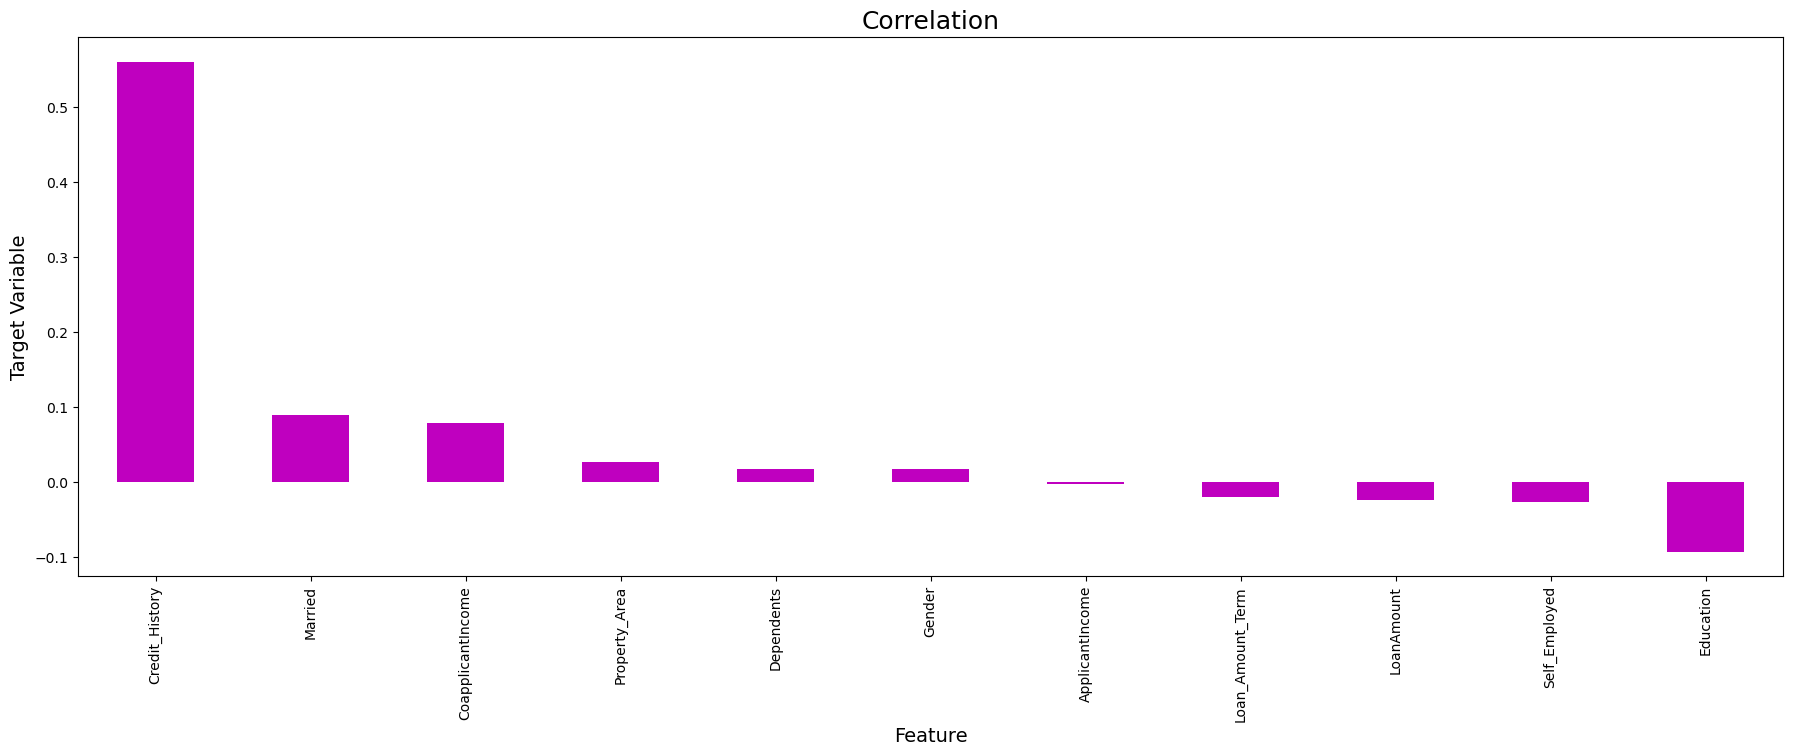

In [63]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target Variable',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From the above correlation graph it is clear that Credit_History is positively correlated with the target and Education is negatively correlated with the target and the column ApplicantIncome is very less correlated with the target 

In [64]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [66]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Here we can notice the class imbalancing issue so let's use SMOTE to balance the data

In [67]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [68]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [70]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8786610878661087  on Random_state  146


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30,random_state=maxRS)

In [72]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8786610878661087
Confusion Matrix:  [[104  17]
 [ 12 106]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.86      0.88       121
           1       0.86      0.90      0.88       118

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



In [73]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.7405857740585774
Confusion Matrix:  [[ 71  50]
 [ 12 106]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.59      0.70       121
           1       0.68      0.90      0.77       118

    accuracy                           0.74       239
   macro avg       0.77      0.74      0.73       239
weighted avg       0.77      0.74      0.73       239



In [74]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.7907949790794979
Confusion Matrix:  [[ 83  38]
 [ 12 106]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.69      0.77       121
           1       0.74      0.90      0.81       118

    accuracy                           0.79       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.81      0.79      0.79       239



In [75]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8493723849372385
Confusion Matrix:  [[ 97  24]
 [ 12 106]]
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.80      0.84       121
           1       0.82      0.90      0.85       118

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239



In [76]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
y_pred = ADA.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8242677824267782
Confusion Matrix:  [[ 92  29]
 [ 13 105]]
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.76      0.81       121
           1       0.78      0.89      0.83       118

    accuracy                           0.82       239
   macro avg       0.83      0.83      0.82       239
weighted avg       0.83      0.82      0.82       239



In [77]:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
y_pred = BG.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8158995815899581
Confusion Matrix:  [[105  16]
 [ 28  90]]
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.87      0.83       121
           1       0.85      0.76      0.80       118

    accuracy                           0.82       239
   macro avg       0.82      0.82      0.82       239
weighted avg       0.82      0.82      0.82       239



In [78]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8451882845188284
Confusion Matrix:  [[107  14]
 [ 23  95]]
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.88      0.85       121
           1       0.87      0.81      0.84       118

    accuracy                           0.85       239
   macro avg       0.85      0.84      0.84       239
weighted avg       0.85      0.85      0.84       239



In [79]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.76875    0.79874214 0.8490566  0.89308176 0.89308176]
0.8405424528301888
Difference between accuracy score and cross validation score is:  0.0046458316886396345


In [80]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.7        0.72955975 0.74213836 0.66666667 0.70440252]
0.7085534591194967
Difference between accuracy score and cross validation score is:  0.1366348253993317


In [81]:
score2=cross_val_score(svm,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.71875    0.72955975 0.77358491 0.73584906 0.74213836]
0.7399764150943395
Difference between accuracy score and cross validation score is:  0.1052118694244889


In [82]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.7375     0.69811321 0.8427673  0.83647799 0.87421384]
0.7978144654088051
Difference between accuracy score and cross validation score is:  0.04737381911002336


In [83]:
score4=cross_val_score(ADA,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.66875    0.71069182 0.78616352 0.78616352 0.81132075]
0.7526179245283019
Difference between accuracy score and cross validation score is:  0.09257035999052654


In [84]:
score5=cross_val_score(BG,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score5.mean()))

[0.76875    0.72327044 0.78616352 0.82389937 0.83647799]
0.7877122641509434
Difference between accuracy score and cross validation score is:  0.05747602036788502


In [85]:
score6=cross_val_score(DTC,x,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score6.mean()))

[0.75       0.73584906 0.81132075 0.81761006 0.86163522]
0.7952830188679246
Difference between accuracy score and cross validation score is:  0.04990526565090381


I am choosing RandomForestClassifier as the best working model as the difference between the Accuracy score and cross validation score is minimum for this classifier  

In [86]:
param_grid = {'n_estimators':[100], 
              'criterion':['gini'], 
              'max_depth':[None], 
              'min_samples_split':[2], 
              'min_samples_leaf':[1], 
              'min_weight_fraction_leaf':[0.0], 
              'max_features':['sqrt'], 
              'max_leaf_nodes':[None], 
              'min_impurity_decrease':[0.0], 
              'bootstrap':[True], 
              'oob_score':[False], 
              'n_jobs':[None], 
              'random_state':[None], 
              'verbose':[0], 
              'warm_start':[False], 'class_weight':[None], 'ccp_alpha':[0.0], 'max_samples':[None]
             }

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
GSCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=18)

In [89]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=18, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [90]:
GSCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
final = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred))

Accuracy Score:  0.8870292887029289


We can see that the Accuracy is increased by 1% from 87.86 to 88.70 which is good so saving our model

In [95]:
import joblib
joblib.dump(final, "Loan_Status.pkl")

['Loan_Status.pkl']

In [96]:
model = joblib.load("Loan_status.pkl")
prediction=final.predict(x_test)
prediction

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [97]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
234,1,1
235,1,1
236,0,0
237,1,1


In [98]:
conclusion=pd.DataFrame([final.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0,1,1,1,1,0,1,1,1,0,...,1,0,1,1,0,1,1,0,1,0
Original,0,1,1,1,1,0,1,1,0,0,...,1,0,1,1,0,1,1,0,1,0


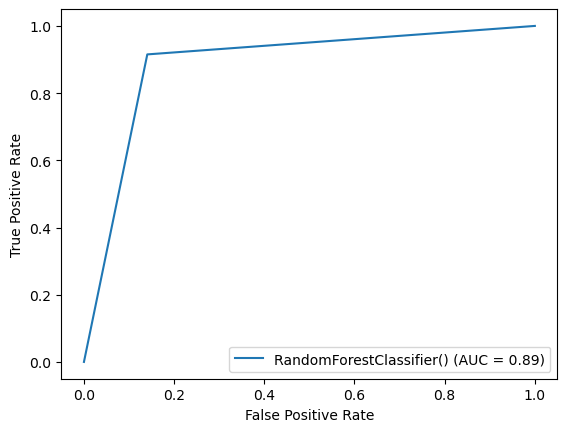

In [101]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()

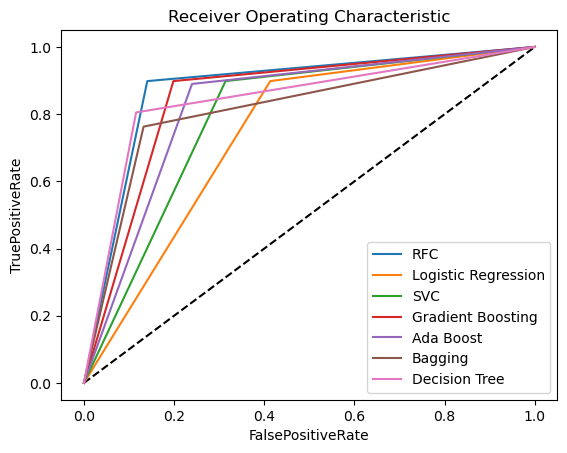

In [103]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = svm.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = ADA.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = BG.predict(x_test)
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 = DTC.predict(x_test)
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "SVC")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Ada Boost")
plt.plot(fpr6, tpr6, label= "Bagging")
plt.plot(fpr7, tpr7, label="Decision Tree")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()